In [ ]:
%%capture
%pip install  pandas transformers datasets matplotlib seaborn scikit-learn


In [120]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

from load_data import load_data, load_tokenizer
tokenizer = load_tokenizer()
train = pd.read_parquet("go_emotions_train.parquet")
test = pd.read_parquet("go_emotions_test.parquet")

emotions = train.columns[1:29]
print(emotions)


max_sequence_length = 200

X_train, X_test, y_train, y_test = load_data(tokenizer, max_sequence_length)


Index(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')


In [119]:
def decode_emotions_to_string(array_of_labels):
    """Decode the emotions from the row to a list of strings."""
    # active labels are 1, inactive are 0
    return [emotion for i, emotion in enumerate(emotions) if array_of_labels[i] == 1]


def decode_emotions_to_index(row):
    """Decode the emotions from the row to a list of indices."""
    return [i for i, emotion in enumerate(emotions) if row[emotion] == 1]

def decode_logits(row, k=3, alphabetic_sort=False):
    """Decode the logits from the row to a list of strings."""
    top = np.argsort(row)[-k:]
    if alphabetic_sort:
        top.sort()
    return [emotions[i] for i in top]



<Axes: title={'center': 'Text length distribution'}, ylabel='Frequency'>

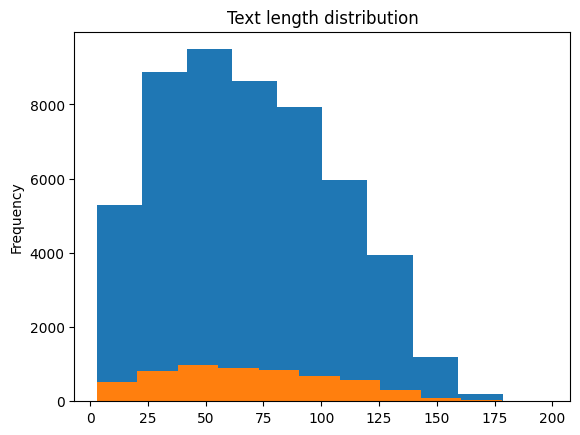

In [121]:
import matplotlib
train["length_text"] = train["text"].apply(len)
train['length_text'].plot(kind='hist', title='Text length distribution')

test["length_text"] = test["text"].apply(len)
test['length_text'].plot(kind='hist', title='Text length distribution')

In [122]:
# remove rows with text length > max_sequence_length   
train = train[train["length_text"] <= max_sequence_length]
test = test[test["length_text"] <= max_sequence_length]


<Axes: title={'center': 'Text length distribution'}, ylabel='Frequency'>

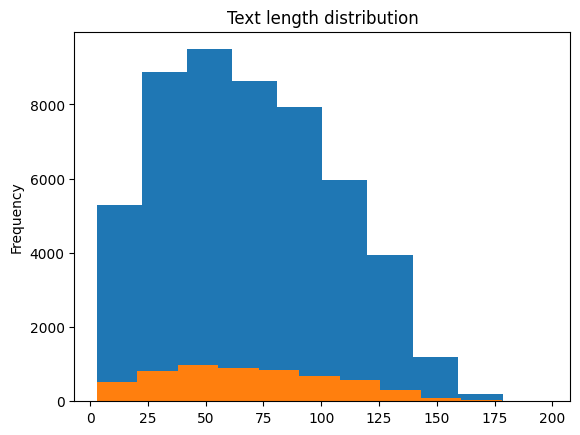

In [123]:
import matplotlib
train["length_text"] = train["text"].apply(len)
train['length_text'].plot(kind='hist', title='Text length distribution')

test["length_text"] = test["text"].apply(len)
test['length_text'].plot(kind='hist', title='Text length distribution')

In [18]:
emotion_to_coarse = {
    'admiration': 'positive',
    'amusement': 'positive',
    'anger': 'negative',
    'annoyance': 'negative',
    'approval': 'positive',
    'caring': 'positive',
    'confusion': 'negative',
    'curiosity': 'positive',
    'desire': 'positive',
    'disappointment': 'negative',
    'disapproval': 'negative',
    'disgust': 'negative',
    'embarrassment': 'negative',
    'excitement': 'positive',
    'fear': 'negative',
    'gratitude': 'positive',
    'grief': 'negative',
    'joy': 'positive',
    'love': 'positive',
    'nervousness': 'negative',
    'optimism': 'positive',
    'pride': 'positive',
    'realization': 'positive',
    'relief': 'positive',
    'remorse': 'negative',
    'sadness': 'negative',
    'surprise': 'positive',
    'neutral': 'neutral'
}

# Create lists of emotions for each coarse category
positive_emotions = [emotion for emotion, category in emotion_to_coarse.items() if category == 'positive']
negative_emotions = [emotion for emotion, category in emotion_to_coarse.items() if category == 'negative']
neutral_emotions =  [emotion for emotion, category in emotion_to_coarse.items() if category == 'neutral']

# Sum the values for positive and negative emotions for each row
train['positive_sum'] = train[positive_emotions].sum(axis=1)
train['negative_sum'] = train[negative_emotions].sum(axis=1)
train['neutral_sum'] = train[neutral_emotions].sum(axis=1)

train


,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,sadness,surprise,neutral,neutral_only,neutral_and_other,neutral_above_1,length_text,positive_sum,negative_sum,neutral_sum
4095,"As long as the minority aren't ""minorities"" I ...",0,0,0,0,0,0,0,0,0,...,0,0,0,False,True,False,71,0,1,0
34642,"Same, I still need to sleep to go to work tomo...",0,0,0,0,1,0,0,0,1,...,0,0,0,False,True,False,51,3,0,0
5142,"Bide your time, keep your eyes open, and build...",0,0,0,0,0,1,0,0,1,...,0,0,0,False,True,False,113,3,0,0
6323,Clock the flair but What are the judges on? I ...,0,0,0,0,0,0,0,1,0,...,0,0,0,False,True,False,94,2,0,0
47759,Who's the top three craft brewers in the area??,0,0,0,0,0,0,0,1,0,...,0,0,0,False,True,False,47,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,"At least I can rest easy, knowing [NAME] isn't...",0,0,0,0,0,0,0,0,0,...,0,0,1,True,False,False,52,0,0,1
39881,That's the same thing 8 year olds use to try a...,0,0,0,0,0,0,0,0,0,...,0,0,0,False,True,False,119,1,1,0
45572,Watching Shark Tank makes me wonder how so man...,0,0,0,0,0,0,0,0,0,...,0,1,0,False,True,False,112,1,0,0
15864,I guess. I respect the boots on the ground cop...,1,1,0,0,0,0,0,0,0,...,0,0,0,False,True,False,111,2,1,0


In [124]:
print(type(X_train[0]), type(y_train[0]))
print(type(X_train[0][0]), type(y_train[0][0]))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.int64'> <class 'numpy.int64'>
(51515, 200) (5724, 200)
(51515, 28) (5724, 28)


In [125]:
import tensorflow as tf ; print("Num GPUs Available: ", tf.config.experimental.list_physical_devices("GPU"))


Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [126]:
num_classes = 28  # Adjust based on your dataset
embedding_dim = 256  # Embedding dimension
max_sequence_length = 200  # Example sequence length, adjust as needed
tokenizer_vocab_size = tokenizer.vocab_size  # Example vocabulary size, adjust as needed

## Convultional Neural Network (CNN)

In [15]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input, BatchNormalization, LSTM, Bidirectional, Reshape
from keras.optimizers import Adam

# Number of classes for multi-label classification

# Define the CNN model architecture
model = Sequential([
    Input(shape=(max_sequence_length,)),
    Embedding(input_dim=tokenizer_vocab_size, output_dim=embedding_dim),  # Embedding layer
    Conv1D(filters=128, kernel_size=32, activation='relu'),  # Conv1D layer
    Dropout(0.2),  # Dropout for regularization
    Dense(2048, activation='relu'),  # Dense layer
    Dense(1512, activation='relu'),  # Dense layer
    Dense(1024, activation='relu'),  # Dense layer
    Conv1D(filters=128, kernel_size=16, activation='relu'),  # Conv1D layer
    Dropout(0.2),  # Dropout for regularization
    Dense(256, activation='relu'),  # Dense layer
    Dense(128, activation='relu'),  # Dense layer
    Conv1D(filters=96, kernel_size=8, activation='relu'),  # Conv1D layer
    Dropout(0.2),  # Dropout for regularization
    Dense(128, activation='relu'),  # Dense layer
    Conv1D(filters=64, kernel_size=5, activation='relu'),  # Conv1D layer
    Conv1D(filters=64, kernel_size=8, activation='relu'),  # Conv1D layer
    GlobalMaxPooling1D(),  # Global max pooling
    Dropout(0.2),  # Dropout for regularization
    Dense(128, activation='relu'),  # Dense layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Dense layer
    Dropout(0.2),  # Dropout for regularization
    Dense(num_classes, activation='sigmoid')  # Output layer for multi-label classification
])
# Summary of the model
model.summary()


2024-06-16 23:27:33.681663: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 23:27:33.681819: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 23:27:33.681878: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 23:27:33.681926: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-16 23:27:33.681973: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 256)          7813632   
                                                                 
 conv1d (Conv1D)             (None, 169, 128)          1048704   
                                                                 
 dropout (Dropout)           (None, 169, 128)          0         
                                                                 
 dense (Dense)               (None, 169, 2048)         264192    
                                                                 
 dense_1 (Dense)             (None, 169, 1512)         3098088   
                                                                 
 dense_2 (Dense)             (None, 169, 1024)         1549312   
                                                                 
 conv1d_1 (Conv1D)           (None, 154, 128)          2

## Transformer Encoder

In [99]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, MultiHeadAttention, GlobalAveragePooling1D
from keras.optimizers import Adam

embedding_dim = 512  # Embedding dimension
max_sequence_length = 200  # Example sequence length, adjust as needed
tokenizer_vocab_size = tokenizer.vocab_size  # Example vocabulary size, adjust as needed
num_classes = 28  # Adjust based on your dataset

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

def build_transformer_model():
    inputs = Input(shape=(max_sequence_length,))
    embedding_layer = Embedding(input_dim=tokenizer_vocab_size, output_dim=embedding_dim)(inputs)
    x = transformer_encoder(embedding_layer, head_size=384, num_heads=4, ff_dim=384, dropout=0.1)
    x = transformer_encoder(x,               head_size=384, num_heads=4, ff_dim=384, dropout=0.1)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.1)(x)
    
    x = Dense(1024, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    outputs = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    return model

# Build the model
model = build_transformer_model()

# Summary of the model
model.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 200)]                0         []                            
                                                                                                  
 embedding_15 (Embedding)    (None, 200, 512)             1562726   ['input_16[0][0]']            
                                                          4                                       
                                                                                                  
 layer_normalization_60 (La  (None, 200, 512)             1024      ['embedding_15[0][0]']        
 yerNormalization)                                                                                
                                                                                           

In [68]:
result = model.predict(X_train[0:1])
decoded = decode_logits(result[0], k=3, alphabetic_sort=True)
y_train[0]

print(result)
print(decoded)
print(decode_emotions_to_string(y_train[0]))

1/1 [==============================] - 0s 288ms/step
[[0.4060692  0.30911326 0.30569783 0.32164896 0.18355535 0.33891717
  0.51138616 0.5754442  0.74831736 0.6371823  0.4463154  0.5330856
  0.4585348  0.8208208  0.4039716  0.42799556 0.4484758  0.5489841
  0.31696117 0.3885523  0.5735042  0.55337226 0.6397506  0.75216395
  0.7138752  0.39692912 0.51954585 0.4933341 ]]
['desire', 'excitement', 'relief']
['disapproval']


## Hierarchical Model

In [28]:

from keras.models import Model
from keras.layers import Input, Dense, Embedding, LSTM, Dropout, concatenate, Flatten


input_layer = Input(shape=(max_sequence_length,))
embedding_layer = Embedding(input_dim=tokenizer_vocab_size, output_dim=max_sequence_length)(input_layer)
dropout_layer = Dropout(rate=0.5)(embedding_layer)
flat_layer = Flatten()(dropout_layer)

# Coarse-grained classification layer
coarse_output_layer = Dense(units=3, activation='softmax')(flat_layer)

# Fine-grained classification layer
fine_output_layer = Dense(units=128, activation='relu')( concatenate([coarse_output_layer, flat_layer]))
fine_output_layer = Dropout(rate=0.5)(fine_output_layer)
fine_output_layer = Dense(units=28, activation='sigmoid')(fine_output_layer)


model = Model(inputs=input_layer, outputs=fine_output_layer)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 200, 200)             6104400   ['input_3[0][0]']             
                                                                                                  
 dropout_12 (Dropout)        (None, 200, 200)             0         ['embedding_2[0][0]']         
                                                                                                  
 flatten (Flatten)           (None, 40000)                0         ['dropout_12[0][0]']          
                                                                                            

## Train Model

In [100]:
X_train.shape, y_train.shape

((51515, 200), (51515, 28))

In [101]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming y_train is your multi-label binary matrix (samples x labels)
# Flatten y_train to a 1D array for each label
class_weights = []
for i in range(y_train.shape[1]):
    class_weight = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train[:, i])
    class_weights.append(class_weight)

# Convert to a dictionary format suitable for Keras
class_weight_dict = {i: {0: class_weights[i][0], 1: class_weights[i][1]} for i in range(len(class_weights))}

print(class_weight_dict)



{0: {0: 0.603615954255718, 1: 2.912755852086396}, 1: {0: 0.5488610454090221, 1: 5.616550370693415}, 2: {0: 0.5534843243010937, 1: 5.1742667738047405}, 3: {0: 0.6034603940678959, 1: 2.916383605072464}, 4: {0: 0.6444369386274362, 1: 2.2308591720076216}, 5: {0: 0.5377685450028186, 1: 7.119264787175235}, 6: {0: 0.5479736198276779, 1: 5.7111973392461195}, 7: {0: 0.5562574236043624, 1: 4.9438579654510555}, 8: {0: 0.5229099841650088, 1: 11.412272928666372}, 9: {0: 0.5569309606694198, 1: 4.891283706798329}, 10: {0: 0.5718551574086408, 1: 3.9792213811215817}, 11: {0: 0.5267382413087934, 1: 9.849904397705545}, 12: {0: 0.511629985698395, 1: 21.996157130657558}, 13: {0: 0.5321027950503027, 1: 8.287483912483912}, 14: {0: 0.5142757312568633, 1: 18.012237762237763}, 15: {0: 0.5437283627459258, 1: 6.2171132029930005}, 16: {0: 0.5027913876905659, 1: 90.06118881118881}, 17: {0: 0.5415221276148429, 1: 6.520886075949367}, 18: {0: 0.5332153355690804, 1: 8.02664381427236}, 19: {0: 0.507717022786407, 1: 32.8

In [109]:

from matplotlib import pyplot as plt    
import datetime
from metrics import all_metrics, cosine_similarity_loss


log_dir = "./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, embeddings_freq=1)


# Learning rate scheduler callback

def scheduler(epoch, lr, warmup=3, steps=10):
    if epoch < 3:
        return lr * 1.3
    elif epoch % steps == 0:
        return lr * 0.9
    else:
        return lr * 0.99


lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler)
initial_lr = 1e-4

adam  = keras.optimizers.Adam( learning_rate=initial_lr, weight_decay=0.01)
adamW = keras.optimizers.AdamW(learning_rate=initial_lr, weight_decay=0.01)
sgd =   keras.optimizers.SGD(  learning_rate=initial_lr, momentum=0.9)
rms =   keras.optimizers.RMSprop(learning_rate=initial_lr, rho=0.9)


# Usage in model compilation and training
model.compile(optimizer=adam, loss=cosine_similarity_loss, metrics=all_metrics)

In [110]:


history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), workers=2, use_multiprocessing=True)


Epoch 1/100
68/68 [==============================] - 54s 702ms/step - loss: 0.1783 - f1_score: 0.3948 - auc: 0.8297 - precision: 0.7243 - recall: 0.2512 - R2: 0.2261 - binary_crossentropy: 0.1784 - false_positives: 10137.0000 - false_negatives: 79360.0000 - true_positives: 26627.0000 - true_negatives: 1326296.0000 - precision_over_recall: 0.4580 - roc: 0.8297 - val_loss: 0.1933 - val_f1_score: 0.3491 - val_auc: 0.7783 - val_precision: 0.6819 - val_recall: 0.2128 - val_R2: 0.1791 - val_binary_crossentropy: 0.1934 - val_false_positives: 1166.0000 - val_false_negatives: 9243.0000 - val_true_positives: 2499.0000 - val_true_negatives: 147364.0000 - val_precision_over_recall: 0.3757 - val_roc: 0.7783
Epoch 2/100
68/68 [==============================] - 48s 701ms/step - loss: 0.1760 - f1_score: 0.3999 - auc: 0.8362 - precision: 0.7277 - recall: 0.2621 - R2: 0.2343 - binary_crossentropy: 0.1760 - false_positives: 10393.0000 - false_negatives: 78213.0000 - true_positives: 27774.0000 - true_nega

In [ ]:
history.history

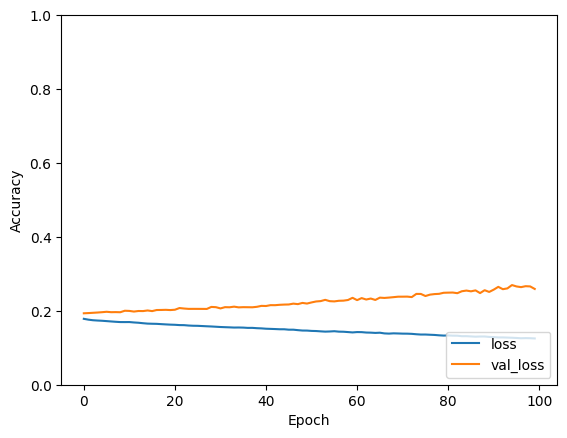

In [117]:
from matplotlib import pyplot as plt
# plot the history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()



In [114]:
loss, accuracy, precision, recall,_  = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


179/179 [==============================] - 7s 36ms/step - loss: 0.2123 - f1_score: 0.3131 - auc: 0.7546 - precision: 0.6299 - recall: 0.1654 - R2: 0.1207 - binary_crossentropy: 0.2123 - false_positives: 1141.0000 - false_negatives: 9800.0000 - true_positives: 1942.0000 - true_negatives: 147389.0000 - precision_over_recall: 0.3105 - roc: 0.7546


ValueError: too many values to unpack (expected 4)